In [1]:
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
Logger = logging.getLogger(__name__)

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=1000) 

# Radian and degree

Radian is based on how many radiuses to wrap the circle and it is ```pi``` for radius = 1. 

* ```360 degrees``` is equivalent with ```2 x pi radians```
* ```1 radian``` is equivalent with ```(180 / pi) degrees``` 

<img src="image/radian.png" align="left">
<img src="image/pi.png" align="left">


### Confusion

Be clear **on which scale/unit** you are handling the angle. No **inch** and **cm** like mix up. ```pi``` is NOT a scale but a number of units on the radian scale.

* ```pi``` is on the **radian scale**, 3.14159265... units on the radian scale (the standard scale like 3.14159265 cm).
* ```180``` is on the **degree scale**, 360 units on the degree scale (like 180 inch).

Trigonometric function e.g. ```np.sin(θ)``` is **radian** based. Need to convert to radians from degrees.

In [2]:
def degree_to_radian(degrees):
    return np.radians(degrees)

print(f"{180/np.pi} degrees are almost equivalent with {degree_to_radian(180/np.pi)} radians")
for angle in range(0, 361, 90):
    print(f"{angle:3} degrees is {degree_to_radian(angle):1.5f} radians, which is {degree_to_radian(angle) / np.pi } pi")


57.29577951308232 degrees are almost equivalent with 1.0 radians
  0 degrees is 0.00000 radians, which is 0.0 pi
 90 degrees is 1.57080 radians, which is 0.5 pi
180 degrees is 3.14159 radians, which is 1.0 pi
270 degrees is 4.71239 radians, which is 1.5 pi
360 degrees is 6.28319 radians, which is 2.0 pi


# Rotation

For the basis units ```u=(1, 0)``` and ```v=(0,1)``` in the cartesian coordinate system, the rotation matrix 
$
R =
\begin {bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) 
\end {bmatrix}
$ rotates ```u``` and ```v``` as 

$
\begin {align*}
R @u &= 
\begin {bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) 
\end {bmatrix}
@
\begin {bmatrix}
1 \\
0
\end {bmatrix} 
=
\begin {bmatrix}
cos(\theta) \\
sin(\theta)
\end {bmatrix} 
\\
\\
R@v&=
\begin {bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) 
\end {bmatrix}
@
\begin {bmatrix}
0 \\
1
\end {bmatrix} 
= 
\begin {bmatrix}
-sin(\theta)\\
cos(\theta) 
\end {bmatrix} 
\end {align*}
$


<img src="image/rotation.png" align="left">

In [3]:
def rotate(X, θ):
    """Rotate X with θ radians counter-clockwise
    Args:
        X: data of shape (N, 2) where each point is (x, y) and N is number of points.
        θ: radian to rotate
    Returns:
        Z: roated data of shape (N, 2)
    """
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    Z = np.matmul(
        np.array([
            [np.cos(θ), -np.sin(θ)],
            [np.sin(θ), np.cos(θ)]
        ]),
        X.T     # (N, 2) to (2, M) to be able to (2, 2) @ (2, N)
    )
    return Z.T


## Rotation example

Rotate the plots with θ radians.

### Plot data generation

In [4]:
def linear_separable(d: int = 2, n: int = 1000):
    """Generate a data set X to linearly separate.
    Args:
        d: number of dimension of the data
        n: number of data to generate
    Returns:
        X dot W > 0 is True and < 0 for False.

        X: d dimension data (x0, x1, ... xn) where x0=1 as bias
        T: labels. If Xi dot W > 0, then 1 else 0
        W: Vector orthogonal to the linear hyper plane that separates the data.
    """
    # Unit vector w of dimension d, dividing by its magnitude
    W = np.random.randn(d)
    W = W / np.linalg.norm(W)

    # Generate X:(N,D) and set bias=1 to x0
    X = np.random.randn(n, d)

    # Label t = 1 if X dot w > 0 else 0
    T = (np.einsum('ij,j', X, W) > 0).astype(int)
    return X, T, W


N = 500    # Number of plots
D = 2      # Number of features
X, T, V = linear_separable(d=D, n=N)
print(X.shape)

(500, 2)


### Plots points and rotate them θ radians

In [5]:
def plot(ax, col, X, title):
    ax[col].set_xlim(-3, 3)
    ax[col].set_ylim(-3, 3)
    ax[col].set_xlabel('x1 label')  # Add an x-label to the axes.
    ax[col].set_ylabel('x2 label')  # Add a y-label to the axes.
    ax[col].axis('equal')
    ax[col].set_title(title)

    ax[col].scatter(X[T==0, 0], X[T==0, 1], c='red')
    ax[col].scatter(X[T==1, 0], X[T==1, 1], c='green')
    ax[col].grid()


<IPython.core.display.Javascript object>


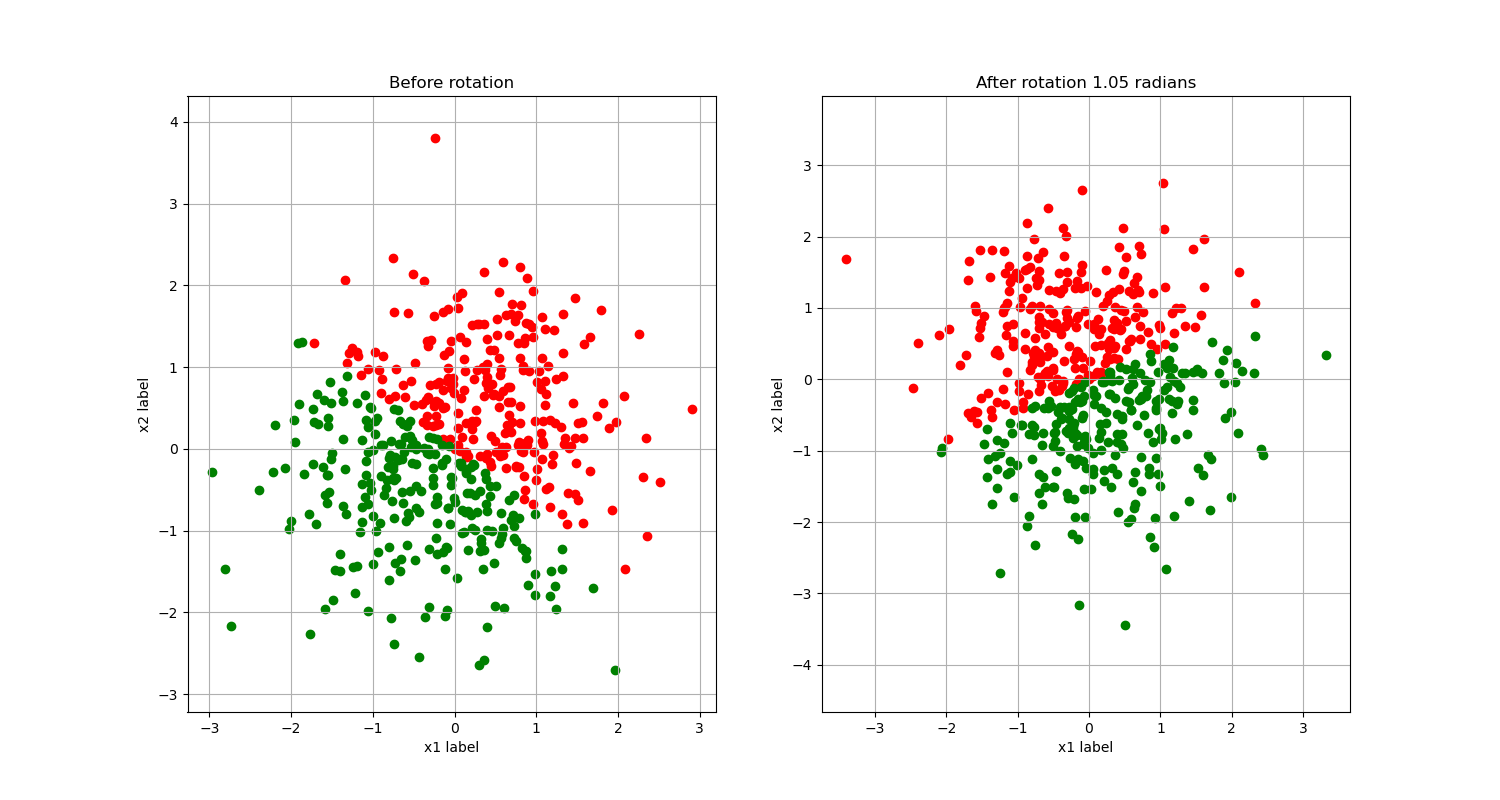

In [6]:
θ = np.pi/3
fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 


# ----------------------------------------------------------------------
# Before rotation
# ----------------------------------------------------------------------
plot(ax, 0, X, "Before rotation")
# ----------------------------------------------------------------------
# After rotation
# ----------------------------------------------------------------------
Z = rotate(X, θ)
plot(ax, 1, Z, f"After rotation {θ:1.2f} radians")

# Polar coordinate plots

<IPython.core.display.Javascript object>


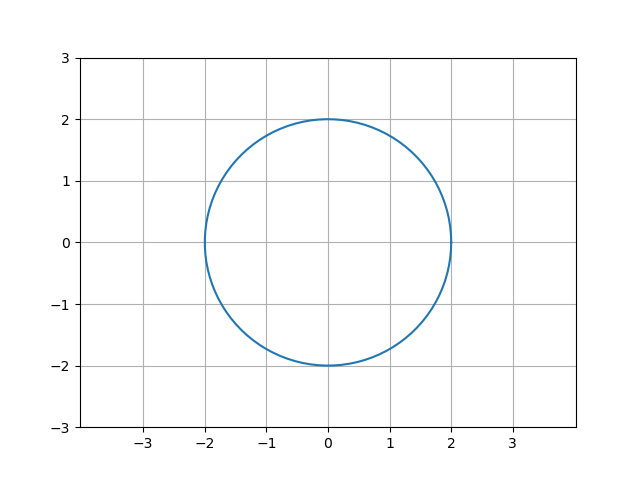

In [7]:
radius = 2
angle = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots() 

# For the same scaling
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html
ax.axis('equal')

ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid()

ax.plot(radius * np.cos(angle), radius * np.sin(angle))
plt.show()

# Trigonometric functions

## tan(θ)

Beware the cycle of θ in ```(-pi/2, +pi/2)``` as tan(θ)=+/-inf for ```-pi / 2``` and ```pi / 2```. 

<IPython.core.display.Javascript object>


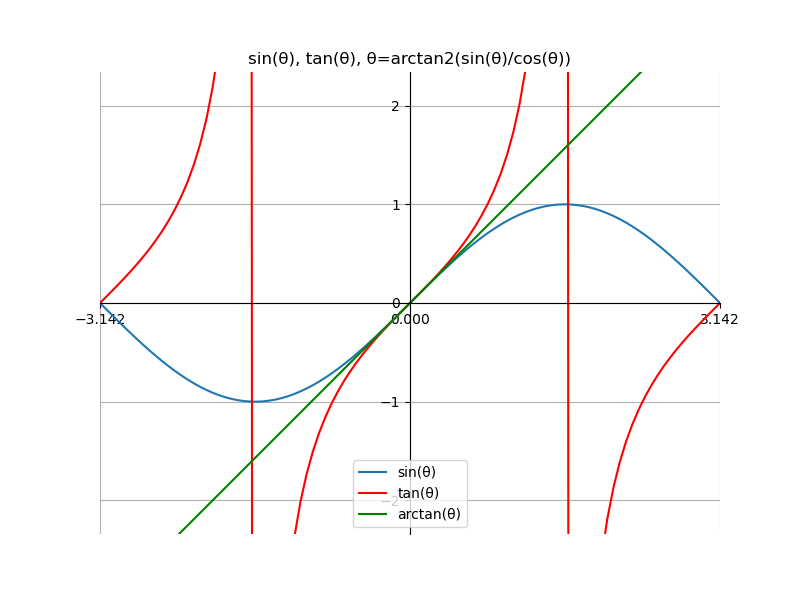

In [8]:
# --------------------------------------------------------------------------------
# Plot space (axes)
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6)) 
ax.axis('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# --------------------------------------------------------------------------------
# Set plot space limis and ticks
# --------------------------------------------------------------------------------
cycles = 1
radius = 2
boundaries = [-cycles * np.pi, cycles * np.pi]

ax.set_xticks(np.linspace(boundaries[0], boundaries[1], 3))
ax.set_yticks(np.linspace(-radius, radius, 2*radius +1))
ax.set_xlim(-cycles * np.pi, cycles * np.pi)
ax.set_ylim(-radius, radius)

# --------------------------------------------------------------------------------
# sin(θ), tan(θ), θ=arctan2(sin(θ)/cos(θ))
# --------------------------------------------------------------------------------
θ = np.linspace(-cycles * np.pi, cycles * np.pi, 100)
ax.plot(θ, np.sin(θ), label="sin(θ)")
ax.plot(θ, np.tan(θ), label="tan(θ)", color='r')
ax.plot(θ, np.arctan2(np.sin(θ), np.cos(θ)), label="arctan(θ)", color='g')

ax.grid()
ax.set_title("sin(θ), tan(θ), θ=arctan2(sin(θ)/cos(θ))")
ax.legend()

## arctan2(y/x)

> Array of angles in radians, in the range ```[-pi, pi]```.

arcus/arc means inverse. atan(rise) or actan(rise) is the inverse of tan(θ) to get θ.

<img src="image/arcus_tangent.png" align="left" width=300/>

<img src="image/arctan.png" align="left" width=300/>

### arctan2 values

(x,y)=( 1, 0), arctan2(y, x) is    0.0 pi
(x,y)=( 1, 1), arctan2(y, x) is   0.25 pi
(x,y)=( 0, 1), arctan2(y, x) is    0.5 pi
(x,y)=(-1, 1), arctan2(y, x) is   0.75 pi
(x,y)=(-1, 0), arctan2(y, x) is    1.0 pi
(x,y)=(-1,-1), arctan2(y, x) is  -0.75 pi
(x,y)=( 0,-1), arctan2(y, x) is   -0.5 pi
(x,y)=( 1,-1), arctan2(y, x) is  -0.25 pi


<IPython.core.display.Javascript object>


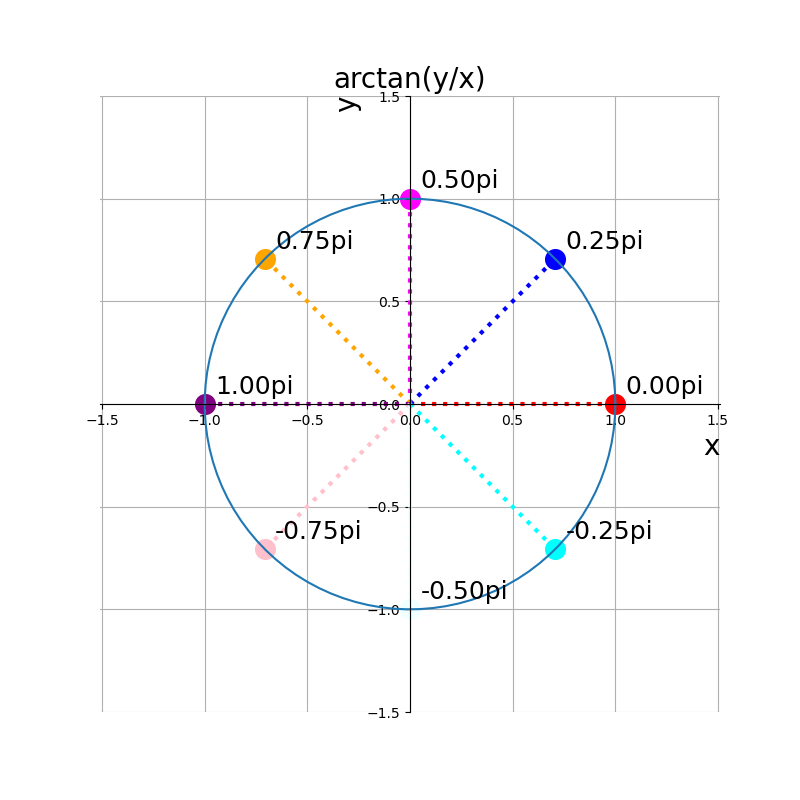

In [9]:
# --------------------------------------------------------------------------------
# Number of pairs (x,y) to caclulate arctan2(y/x)
# --------------------------------------------------------------------------------
n = 8    

# --------------------------------------------------------------------------------
# Base vector to rotate to generate n coordinates
# --------------------------------------------------------------------------------
b = np.array([1, 0])  # base

# --------------------------------------------------------------------------------
# arctan(y/x) at each coordiante
# --------------------------------------------------------------------------------
for i, x in enumerate(
    [np.rint(rotate(b, (2 * np.pi / n) * steps)).astype(int) for steps in range(0, n)]
):
    print(f"(x,y)=({x[0]:2},{x[1]:2}), arctan2(y, x) is {np.arctan2(x[1], x[0]) / np.pi :6} pi")    # -4/pi

# --------------------------------------------------------------------------------
# Plot circle upon which plot the coordinates
# --------------------------------------------------------------------------------
angle = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots(figsize=(8,8)) 
ax.axis('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))
ax.set_xlabel("x", loc='right', fontsize=20)
ax.set_ylabel("y", loc='top', fontsize=20)
ax.set_title("arctan(y/x)", fontsize=20)

# --------------------------------------------------------------------------------
# Plot arctan(y/x) for each (x, y)
# --------------------------------------------------------------------------------
colors=['red', 'blue', 'magenta','orange','purple','pink','azure','cyan','violet', 'darkcyan']
ax.plot(1 * np.cos(angle), 1 * np.sin(angle))
for i, x in enumerate(
    # Rotate the base ((2 * np.pi / n) * steps) radians 
    [rotate(b, (2 * np.pi / n) * steps) for steps in range(0, n)]
):
    # print(f"(x,y)=({x[0]:2},{x[1]:2}), arctan2(y, x) is {np.arctan2(x[1], x[0]) / np.pi :6} pi")
    ax.scatter(x[0], x[1], s=200, color=colors[i])
    ax.plot([0,x[0]], [0, x[1]], linestyle='dotted', linewidth=3, color=colors[i])
    ax.annotate(
        f"{np.arctan2(x[1], x[0])/np.pi :.2f}pi", 
        (x[0], x[1]), 
        xytext=(x[0]+0.05, x[1]+0.05),
        fontsize=18
    )

ax.grid()


### arctan2(y/x) with moving y with fixed x=1 and x=-1

<IPython.core.display.Javascript object>


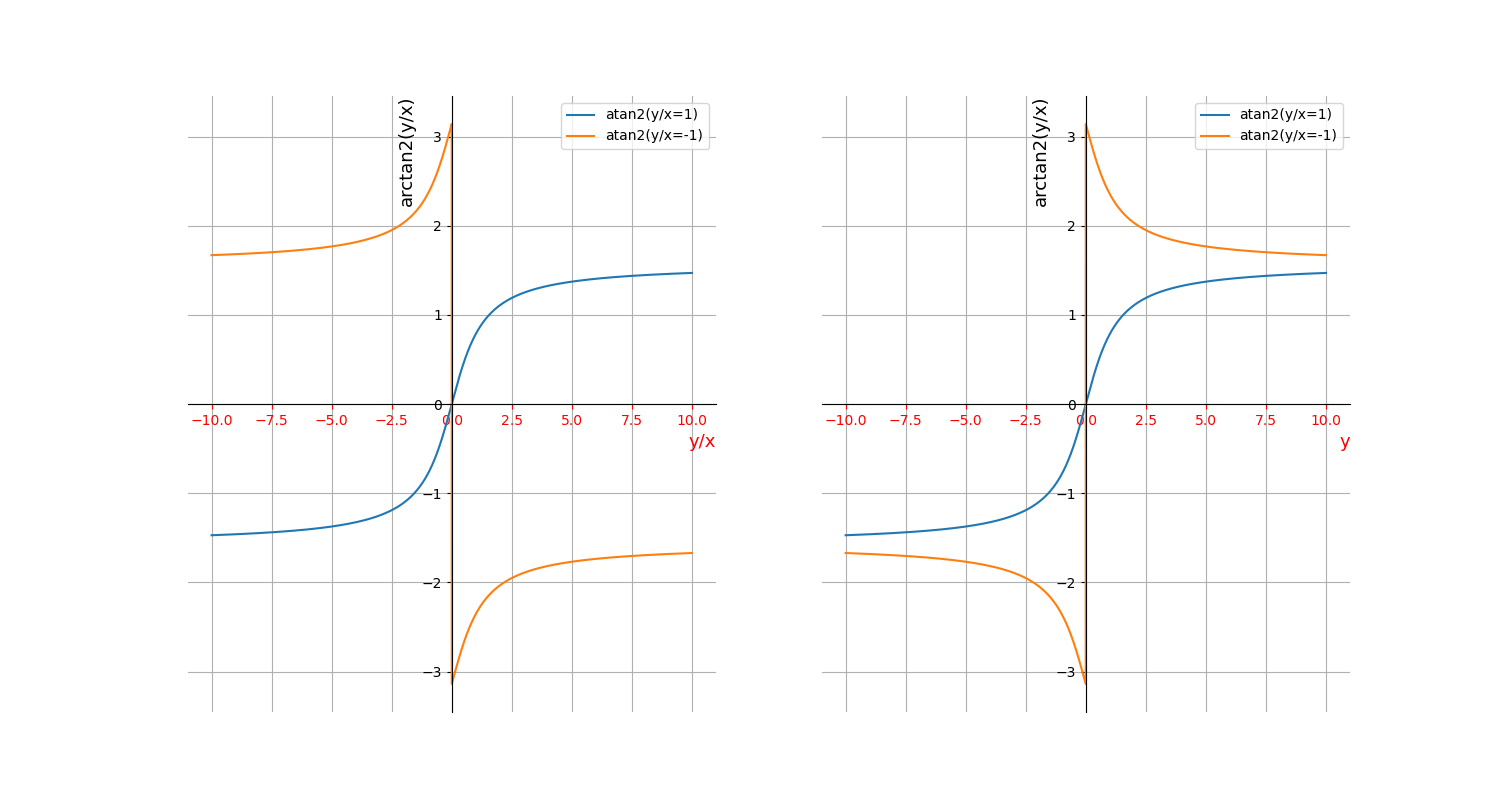

In [10]:
x1 = 1
y = np.linspace(-10, 10, 10001)[1:]

fig, ax = plt.subplots(1, 2, figsize=(15,8)) 

# --------------------------------------------------------------------------------
# y/x and arctan(y/x)
# --------------------------------------------------------------------------------
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['left'].set_position('zero')

ax[0].set_xlabel("y/x", loc='right', fontsize=13, color='r')
ax[0].set_ylabel("arctan2(y/x)", loc='top', fontsize=13)
ax[0].tick_params(axis='x', colors='red')
ax[0].tick_params(axis='y')
ax[0].grid()

x2 = -1
ax[0].plot(y/x1, np.arctan2(y, x1), label="atan2(y/x=1)")
ax[0].plot(y/x2, np.arctan2(y, x2), label="atan2(y/x=-1)")
ax[0].legend()


# --------------------------------------------------------------------------------
# y and arctan(y/x)
# --------------------------------------------------------------------------------
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['left'].set_position('zero')

ax[1].set_xlabel("y", loc='right', fontsize=13, color='r')
ax[1].set_ylabel("arctan2(y/x)", loc='top', fontsize=13)
ax[1].tick_params(axis='x', colors='red')
ax[1].tick_params(axis='y')
ax[1].grid()

x2 = -1
ax[1].plot(y, np.arctan2(y, x1), label="atan2(y/x=1)")
ax[1].plot(y, np.arctan2(y, x2), label="atan2(y/x=-1)")
ax[1].legend()

### arctan2(y/x) with moving x with fixed y=1 and y=-1

<IPython.core.display.Javascript object>


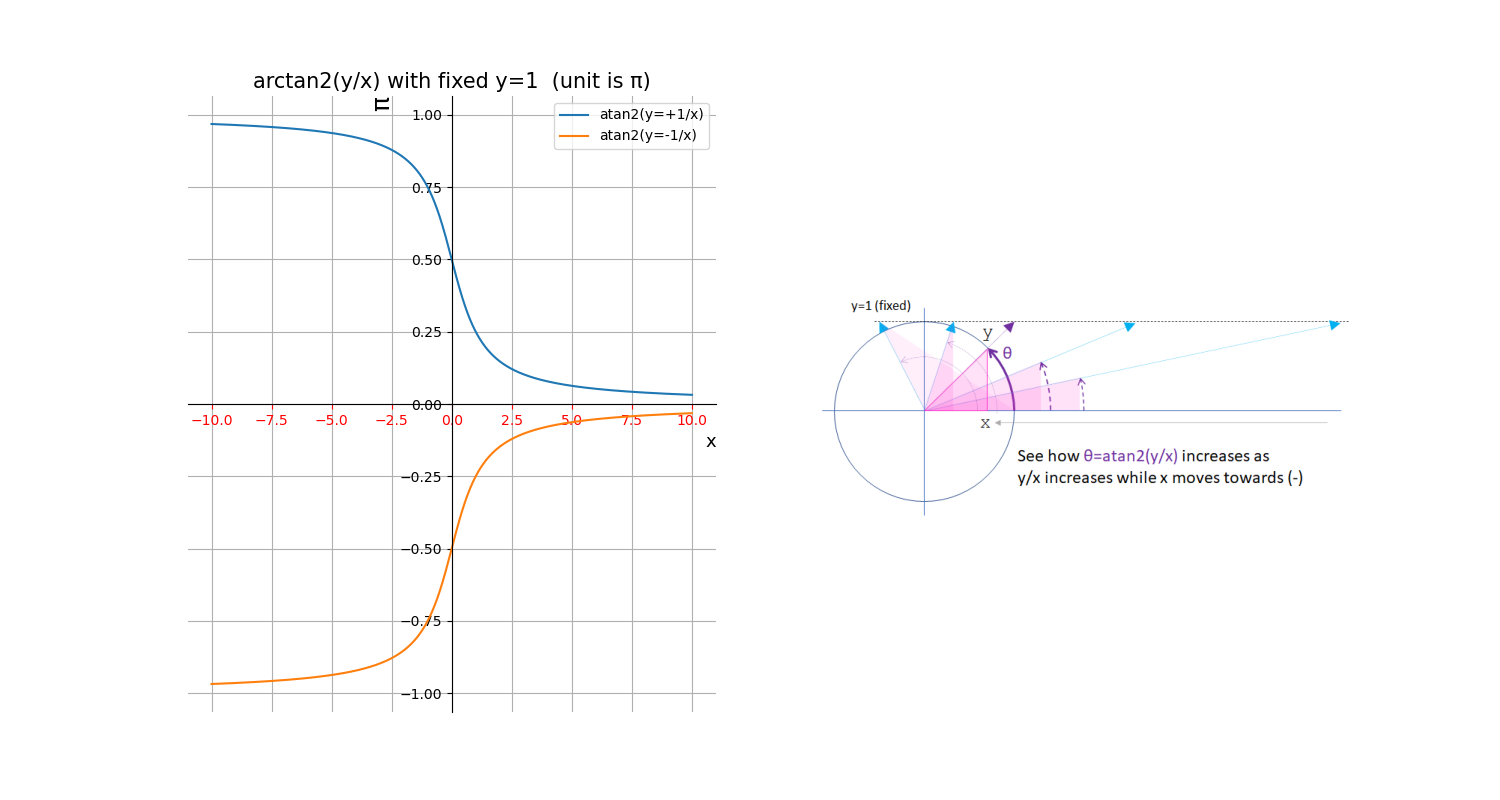

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,8)) 

# --------------------------------------------------------------------------------
# arctan2(y/x) with y=1 fixed on a scauel with unit=π)
# --------------------------------------------------------------------------------
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['left'].set_position('zero')
ax[0].set_xlabel("x", loc='right', fontsize=13)
ax[0].set_ylabel("π", loc="top", fontsize=18)
ax[0].set_title("arctan2(y/x) with fixed y=1  (unit is π)", fontsize=15)
ax[0].tick_params(axis='x', colors='red')
ax[0].grid()

x = np.linspace(-10, 10, 10001)[::-1]
y1 = 1
ax[0].plot(x, np.arctan2(y1, x) / np.pi, label="atan2(y=+1/x)")
y2 = -1
ax[0].plot(x, np.arctan2(y2, x) / np.pi, label="atan2(y=-1/x)")
ax[0].legend()

# --------------------------------------------------------------------------------
# θ = arctan2(y=1/x) increase as x moves from + to -.
# --------------------------------------------------------------------------------
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False, 
    right=False,
    labelbottom=False,
    labelleft=False
) 
img = mpimg.imread('image/atan2_as_x_move_with_fixed_y.png')
imgplot = ax[1].imshow(img)


### Verify in-between angles

Verify if X is in-between ```θ```, angles ```a``` and ```b```.

<img src="image/find_angle_from_rise.png" width=450 align="left"/>

In [25]:
#def is_point_inside_sector(X: np.ndarray, base: float, coverage: float, radius:float = -1.0):
def is_point_inside_sector(X: np.ndarray, base: float, coverage: float, centre = None, radius: float = -1.0):
    """
    Check if the point(x, y) is within or on the sector with the coverage angle
    starting from the base angle. For instance, base=1/4 pi and coverage is pi,
    then if a point is on/between angles [1/4pi, 5/4pi], returns true.

    Domain: 0 <= base <2pi and 0 <= coverage < 2pi
        (base, coverage)=(b, 0) checks if a point is on the angle b.
        (base, coverage)=(b, 2pi) is valid to check if a point is in a circle


    If coverage > 2pi,

    Args:
        X: Points of (x, y) coordinates. Shape (N,2)
            x is x-coordinate of a poit
            y is y-coordinate of a point
        base: base angle to start the coverage in radian units
        coverage: angles to cover in radian units.
        radius:
    Returns:
        Y: Labels of shape (N,). True if (x,y) is on or between the coverage.
    """
    if not isinstance(X, np.ndarray):
        X = np.array(X, dtype=float).reshape(-1, 2)

    assert (0 <= base < 2 * np.pi) and (0 <= coverage <= 2 * np.pi), \
        "base and coverage need [0, 2pi) but base %s, coverage %s" \
        % (base, coverage)
    end = base + coverage

    X = np.copy(X)
    # y: shape(N,)
    y = X[
        ::,
        1
        ]
    # x: shape(N,)
    x = X[
        ::,
        0
        ]

    if centre is not None and isinstance(centre, np.ndarray) and centre.size == 2:
        centre = centre.reshape(2)
        x -= centre[0]
        y -= centre[1]

    # --------------------------------------------------------------------------------
    # angle=atan2(y/x) is preserved if angle > 0 or mapped to the copmplement
    # of 2pi via (2pi - angle) so that the angle is on/between 0 and 2*pi.
    # angle:shape(N,)
    # --------------------------------------------------------------------------------
    angle = (np.arctan2(y, x) + (2 * np.pi)) % (2 * np.pi)

    # --------------------------------------------------------------------------------
    # Y:shape(N,) = AND[ (angle >= base):(N,), (angle < base):(N,) ]
    # Inter-array element-wise AND between array(angle >= base) and array(angle < base).
    # --------------------------------------------------------------------------------
    Y = np.logical_and((angle >= base), (angle < end))

    if radius > 0:
        radii = np.sqrt(np.power(x, 2) + np.power(y, 2))
        Y = np.logical_and(Y, (radii <= radius))

    return Y


Generate random plots within a radius and classify them if they are within (base, base+coverage) sector.

<IPython.core.display.Javascript object>


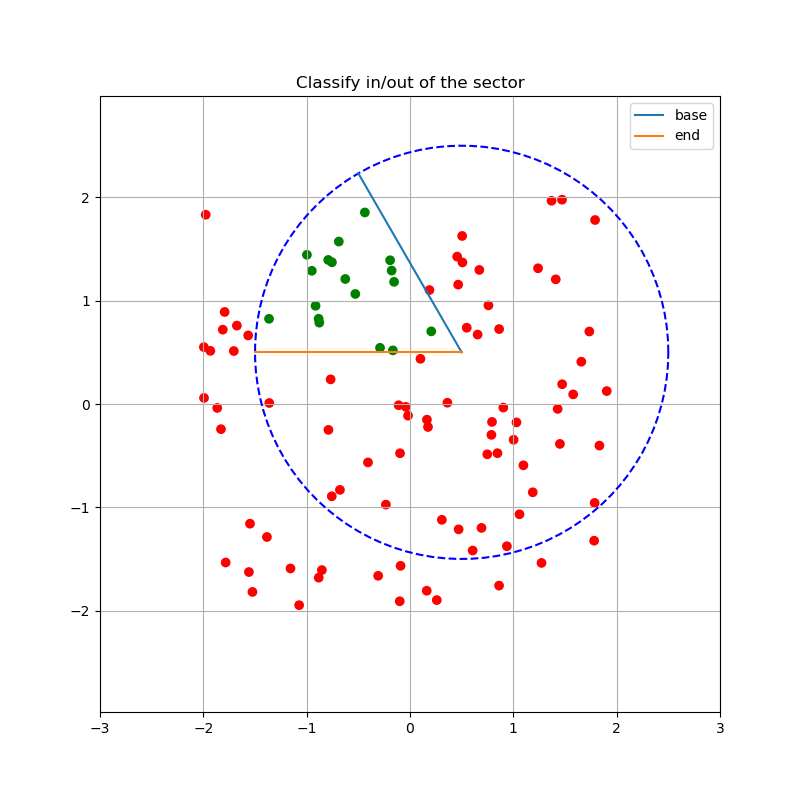

In [29]:
# Centre of the circle
centre=np.array([0.5, 0.5])
# Radius of a circle within which to place plots.
radius = 2   
# labels to classify outside/0/red or inside/1/green.
labels=np.array(['red', 'green'])
# base angle of the sector to cover
base = np.radians(120)
# coverage angle of the sector
coverage = np.radians(60)
end = base + coverage

# --------------------------------------------------------------------------------
# Plot area
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8)) 
ax.axis('equal')
ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title("Classify in/out of the sector")
ax.grid()

# --------------------------------------------------------------------------------
# Cirle within which to place random plots.
# --------------------------------------------------------------------------------
r = np.linspace(0, 2 * np.pi, 100)
ax.plot(centre[0] + radius * np.cos(r), centre[1] + radius * np.sin(r), "b--")

# --------------------------------------------------------------------------------
# Sector to cover (draw lines for base and end)
# --------------------------------------------------------------------------------
ax.plot(
    [0+centre[0], radius * np.cos(base) + centre[0]], 
    [0+centre[1], radius * np.sin(base) + centre[1]], 
    label="base"
)
ax.plot(
    [0+centre[0], radius * np.cos(end) + centre[0]], 
    [0+centre[1], radius * np.sin(end) + centre[1]], 
    label="end"
)

# --------------------------------------------------------------------------------
# Generate random plots within the radius
# --------------------------------------------------------------------------------
N = 100
X = np.random.uniform(-radius, radius, (N, 2))
# X = np.array([[-1.892215,  -0.4709795]])

# --------------------------------------------------------------------------------
#  Classify plots (x, y) if inside the coverage sector
# --------------------------------------------------------------------------------
Y = labels[
    # astype(int) converts True/False into 1/0.
    is_point_inside_sector(X, base, coverage, centre=centre, radius=2.0).astype(int)
]

# --------------------------------------------------------------------------------
# Plot color-classified points.
# --------------------------------------------------------------------------------
ax.scatter(X[::,0], X[::,1], marker='o', color=Y)
ax.legend()

## Split into n sectors

In [14]:
def linear_separable_sectors(n: int=10000, d: int = 2, m: int = 3, r=0.0):
    """Generate a data set X to linearly separate into m sectors.
    Args:
        n: number of coordinates
        d: number of dimension of the data
        m: number of classes (sectors)
        r: angle to rotate X
    Returns:
        X: d dimension data (x0, x1, ... xn) of shape (n, d)
        T: labels (0, 1, ...M-1) of m classees
        B: List of the base (sin(θ), cos(θ)) of each section 
    """
    assert m > 1, f"m {m} > 1 required to split."
    assert d == 2, "currently only d==2 is valid"
    assert n >= m, "At least m instance of coordinates required."

    X = np.random.uniform(-1, 1, (n, d))
    T = np.zeros(n, dtype=int)
    sector = (2 * np.pi) / float(m)    # angle of a sector
    
    B = np.array([[1.0, 0.0]])
    for i in range(1, m):
        base = (sector * i)
        T[is_point_inside_sector(X=X, base=base, coverage=sector)] = i
        B = np.r_[
            B,
            np.array([[np.cos(base), np.sin(base)]])
        ]

    r = r % (2 * np.pi)
    X = rotate(X, r)
    B = rotate(B, r)
    return X, T, B

<IPython.core.display.Javascript object>


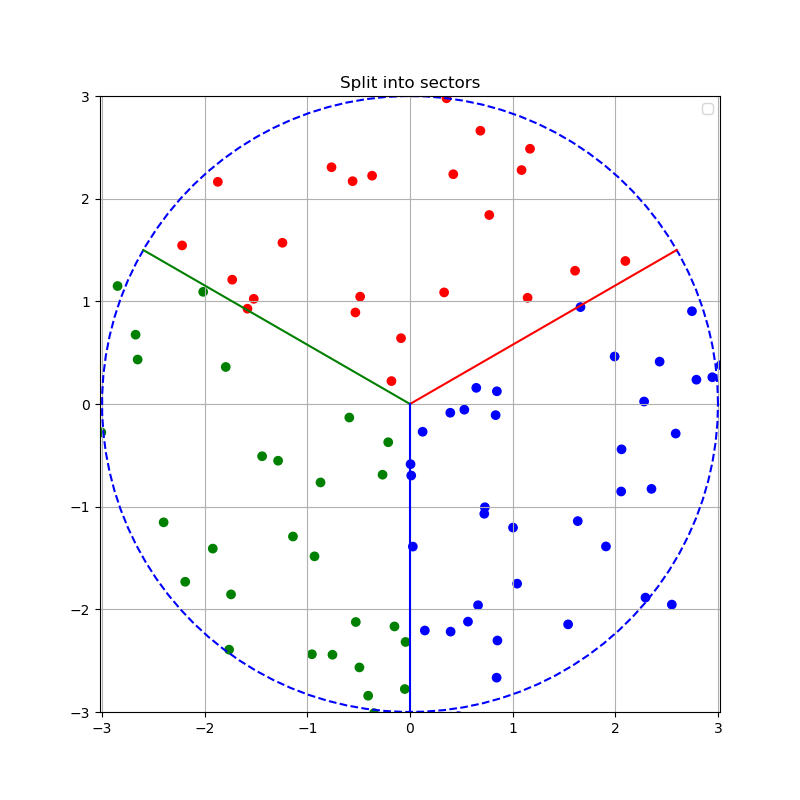

In [15]:
# Radius of a circle within which to place plots.
radius = 3   

# labels to classify outside/0/red or inside/1/green.
labels=np.array([
    'red',
    'green',
    'blue',
    'pink',
    'violet',
    'cyan',
    'magenta',
    'azure',
    'orange',
    'grey',
    'salmon',
    'gold',
    'lime',
    'slategrey',
    'olive',
    'crimson',
    'navy',
    'lavender',
    'yellow',
    'deeppink'
])

# --------------------------------------------------------------------------------
# Plot area
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8)) 
ax.axis('equal')
ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title("Split into sectors")
ax.grid()

# --------------------------------------------------------------------------------
# Cirle within which to place random plots.
# --------------------------------------------------------------------------------
r = np.linspace(0, 2 * np.pi, 100)
ax.plot(radius * np.cos(r), radius * np.sin(r), "b--")

# --------------------------------------------------------------------------------
# Generate X in M sectors. T is the labels (0, 1, ...M-1)
# --------------------------------------------------------------------------------
N = 100
D = 2      # Dimension
M = 3
rotation = np.radians(30)
X, T, B = linear_separable_sectors(n=N, d=D, m=M, r=rotation)

# --------------------------------------------------------------------------------
#  Classify plots (x, y) if inside the coverage sector
# --------------------------------------------------------------------------------
Y = labels[
    T
]

# --------------------------------------------------------------------------------
# Plot color-classified points.
# --------------------------------------------------------------------------------
X = radius * X
ax.scatter(X[::,0], X[::,1], marker='o', color=Y)

# --------------------------------------------------------------------------------
# Plot sector bases
# --------------------------------------------------------------------------------
for i in range(B.shape[0]):
    ax.plot((0, radius * B[i, 0]), (0, radius * B[i, 1]), labels[i])

ax.legend()

---

# N Spherical coordinates to cartesian coordinates

* https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates
* https://math.stackexchange.com/questions/991169

<img src="image/n_spherical_coordinates_to_cartesian.png" align="left" />

In [16]:
def set_in_a_radius(radius: float, d: int, n: int):
    """Generate cartesian coordinate points in a radius in a D dimension space.
    Args:
        radius: A distance within which data points are to be generated
        d: dimensions
        n: number of points to generate
    Returns:
        cartesians: data points in cartesian coordinate of shame (N,D)

    Mapping from n-spherical coordinate to a Cartesian coordinate.
    https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates
    https://math.stackexchange.com/questions/991169

    Unlearn the (x, y, z) coordinates and work on according to the dimensions.
    In a n-spherical coordinate, a point P = (radius, Θ1, Θ2, ... Θi, ..., Θd-1).
    Θi is an angle form axis i to the vector P. Then the xi in a Cartesian system
    xi = cos(Θi) * sin(i+1) * ... * sin(Θd-2) * sin(Θd-1) when i > 0.
    xi = sin(Θi) * sin(i+1) * ... * sin(Θd-2) * sin(Θd-1) when i = 0.
    """
    assert n > 0 and d > 0, radius > 0.0

    # --------------------------------------------------------------------------------
    # Radii with one radius per each data point.
    # Radians for (d - 1) dimensions in a data point (minus 1 for radius dimension)
    # --------------------------------------------------------------------------------
    radii: np.ndarray = np.random.uniform(0, radius, n).reshape((n, 1))
    radians: np.ndarray = np.random.uniform(0, 2 * np.pi, (n, d - 1))

    # --------------------------------------------------------------------------------
    # numpy universal function to generate sin(Θi) * sin(i+1) * ... * sin(Θd-1) at i,
    # then accumulate them for each i.
    # --------------------------------------------------------------------------------
    def func(left, right):
        return left * right

    ufunc = np.frompyfunc(func, 2, 1)

    # --------------------------------------------------------------------------------
    # Generate sin(Θd-1) * ... * sin(i+1) * sin(Θi) for each i in (1, 2, ... d-1).
    # Add ones at column 0, which is later placed at the last column (d-1) in (N,D),
    # after reversed, then becomes cos(Θd-1) as the cartesian coordinate X[(d-1)].
    #
    # Apply ufunc to radians:(N, D-1) without reversing along axis=-1 because there is
    # no-order in the array "radians" before apply ufunc as they are random.
    # Reverse the result sin(Θi) * ... sin(i+1) * sin(Θd-1) along the axis -1 to form
    # [ sin(Θ1) * ... * sin(Θd-1), ..., sin(Θi) * ... * sin(Θd-1), ..., sin(Θd-1), 1 ].
    # --------------------------------------------------------------------------------
    cartesians = np.c_[np.ones(n), np.sin(radians)]
    ufunc.accumulate(
        cartesians,
        axis=-1,
        dtype=np.ndarray,
        out=cartesians
    ).astype(float)
    cartesians = np.flip(cartesians, axis=-1)

    # --------------------------------------------------------------------------------
    # cos(Θi) to generate xi = cos(Θi) * sin(i+1) * ... * sin(Θd-1) for i > 0.
    # Ones at d=0 so that x0 = sin(Θ1) * sin(Θ1 ) * ... * sin(Θd-1) for i = 0.
    # cosins = [1, cos(Θ1), cos(Θ2), ... cos(Θd-1)]
    # --------------------------------------------------------------------------------
    cosines = np.c_[np.ones(n), np.cos(radians)]

    # --------------------------------------------------------------------------------
    # Element multiply cosines [1, cos(Θ1), cos(Θ2), ... cos(Θd-1)] with
    # [ sin(Θ1) * ... * sin(Θd-1), ..., sin(Θi) * ... * sin(Θd-1), ..., sin(Θd-1), 1 ]
    # generates:
    # cos(Θi) * sin(i+1) * ... * sin(Θd-2) * sin(Θd-1) when i > 1.
    # sin(Θi) * sin(i+1) * ... * sin(Θd-2) * sin(Θd-1) when i = 0.
    # --------------------------------------------------------------------------------
    np.multiply(cosines, cartesians, out=cartesians)
    np.multiply(radii, cartesians, out=cartesians)

    del radii, cosines

    return cartesians

In [17]:
from itertools import product, combinations
def draw_sphere(ax, radius, color='indigo'):
    # draw cube
    assert radius > 0
    r = [-radius, radius]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s, e), color="olive", alpha=0.8)

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = radius * np.cos(u) * np.sin(v)
    y = radius * np.sin(u) * np.sin(v)
    z = radius * np.cos(v)
    ax.plot_wireframe(x, y, z, color=color, alpha=0.2)

    # draw a point
    # ax.scatter([0], [0], [0], color="g", s=100)


<IPython.core.display.Javascript object>


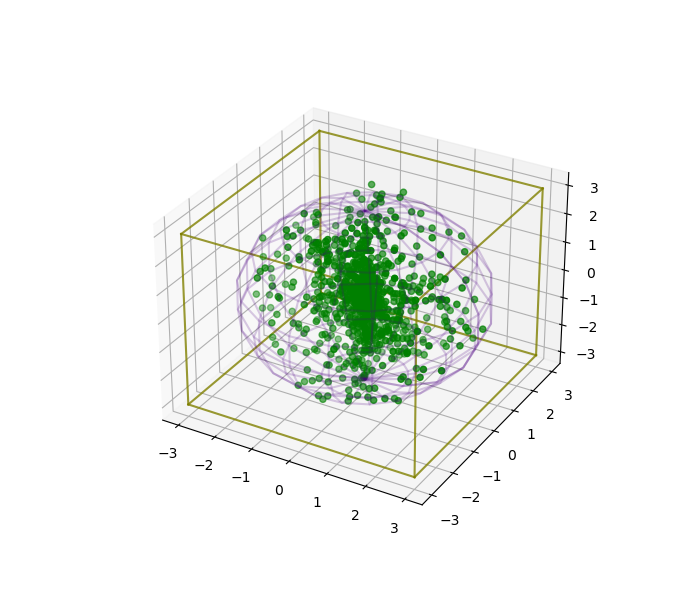

In [18]:
N = 1000
D = 3
radius = 3
Z = set_in_a_radius(radius=radius, n=N, d=D)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.scatter(Z[::, 0], Z[::, 1], Z[::, 2], color='green')
draw_sphere(ax, radius)
ax.grid()